# Linear Regression

With linear regression using the least square method, we are searching for linear relationship between inputs (features, attributes, independent variables) and output (dependent) variables, which "explains", in the bes way (in the mean square sense) given data. 

In Machine Learning terminology, this is the problem of supervised learning, and given data is called the training set.

### On a simple example we will demonstrate 5 ways to perform regression in Python

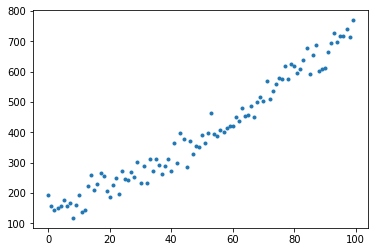

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# we artificially generate training data assuming normally distributed noise:

# We intentionally introduce small quadratic dependence:
x = np.arange(100)
y = 150 + 3*x + 0.03*x**2 + 30*np.random.normal(size=len(x))

# plotting data:

plt.plot(x,y, '.')
plt.show()

### 1st method (direct calculation using derived equations):

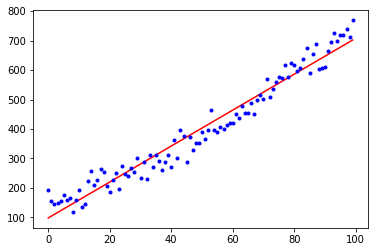

In [2]:
n = len(x)    

Sxx = np.sum(x**2) - n*np.mean(x)**2
#    Syy = np.sum(y**2) - np.sum(y)**2/n    # we don't use Syy  in this code
Sxy = np.sum(x*y) - n*np.mean(x)*np.mean(y)    
mean_x = np.mean(x)
mean_y = np.mean(y)

# Formulas derived during lectures:
a = Sxy/Sxx
b = mean_y - a*mean_x


# plotting of the regression line
y_est_lin = b+a*x  # estimated values of y
plt.plot(x,y_est_lin,'r-',x,y,'b.')
plt.show()

### 2nd method (analytical solution from numpy.linalg (linear algebra) library):

In [3]:
# a) Linear regression (regression line):

# We create the input data matrix:

# we add a fector of all ones: the estimated multiplier of that value is the offset (intercept):   
M1 = np.vstack( (np.ones_like(x), x) ).T  
    
# np.linalg.lstsq solves the equation whose solution are parameters of the regresison line: 
p1 = np.linalg.lstsq(M1, y)   
# p1[0] are the parameters: for line y=a+bx,  a=p1[0][0], b=p1[0][1]
w1=p1[0]  # a=w1[0], b=w1[1]
print(w1)  #
 

[98.13734745  6.10011871]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


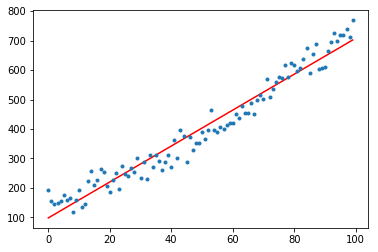

In [4]:
# plotting
y_est_lin = w1[0]+w1[1]*x  # estimated values of y
plt.plot(x,y_est_lin,'r-',x,y,'.')

plt.show()

In [5]:
# From the picture we can guess that there is also some small nonlinear dependence!

In [6]:
# b) Quadratic regression (we fit parabola to data)

# Thsi is still linear regression - we just add one more feature (attribute, input)!

In [7]:
M2 = np.vstack( (np.ones_like(x), x, x**2) ).T   # we add squares of the inputs!

p2 = np.linalg.lstsq(M2, y)   
w2=p2[0]  
print(w2) 
    


[1.49045807e+02 2.98327427e+00 3.14832772e-02]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


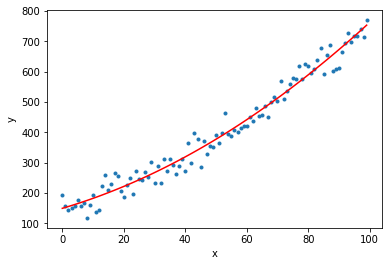

In [8]:
# plotting parabola:
y_est_parabola = w2[0]+w2[1]*x+w2[2]*x**2 # regression parabola
plt.plot(x,y,'.',x,y_est_parabola,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[ 1.53818869e+02  2.38975940e+00  4.65465915e-02 -1.01436460e-04]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


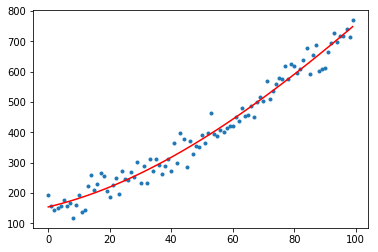

In [9]:
# a) Cubic regression (we fit 3rd order polynomial function)

M3 = np.vstack( (np.ones_like(x), x, x**2, x**3) ).T

p3 = np.linalg.lstsq(M3, y)
     
w3=p3[0]  
print(w3) 

# plotting:
y_est_kub = w3[0]+w3[1]*x+w3[2]*x**2+w3[3]*x**3 
plt.plot(x,y,'.',x,y_est_kub,'r')

plt.show()


#### Exercise: see what happens when you increase the order (4,5,6,..) of the fitted polynomial function.

### 3rd method (using statsmodels library):

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2133.
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.54e-68
Time:                        22:22:19   Log-Likelihood:                -504.97
No. Observations:                 100   AIC:                             1014.
Df Residuals:                      98   BIC:                             1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.1373      7.568     12.968      0.0

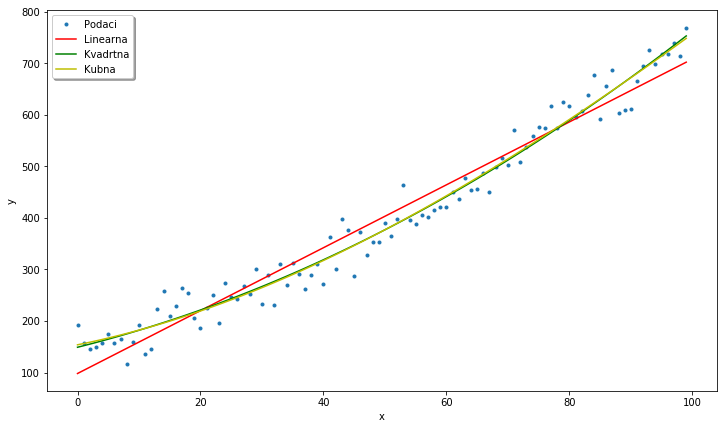

In [10]:
import statsmodels.api as sm
    
Res1 = sm.OLS(y, M1).fit()  # OLS - Ordinary Least Square
Res2 = sm.OLS(y, M2).fit()
Res3 = sm.OLS(y, M3).fit()
    
# In the object which .OLS returns, there are many statistical information about the regression result    
# .summary gives the most important characteristics:
print(Res1.summary())
print(Res2.summary())
print(Res3.summary())

# Each characteristic can be accessed separately, 
# e.g. .fittedvalues are values of regression function on training points x
# e.g. .conf_int() vrgives 95% confidence intervals for parameters

print(Res1.conf_int())
    
# plotting
plt.plot(x,y, '.', label='Podaci')
plt.plot(x, Res1.fittedvalues, 'r', label='Linearna')
plt.plot(x, Res2.fittedvalues, 'g', label='Kvadrtna')
plt.plot(x, Res3.fittedvalues, 'y', label='Kubna')
plt.legend(loc='upper left', shadow=True)
plt.xlabel('x')
plt.ylabel('y')

plt.gcf().set_size_inches(12,7)

plt.show()

#### Interpretation of the results:

#### Df Residuals - number of data (observations) minus number of parameters that we estiamte
#### Df Model - number of independent variables (features, inputs)
#### R squared - Coefficient of determination
#### Adj. R-squared: Modified  R^2, better takes into account numbr of parameters (penalization of large number of parameters) - better for treating overfitting
#### F-statistic -value of the statistic that is used to test hypothesis (H0) that y is independent (jointly) of the input features (x-s) (large value is in favor of the rejection of H0)
####  Prob (F-statistic) - p-value of the test, small values mean that we will reject H0 with good significance level : $\alpha \geq p$
####  Log-Likelihood - Log of the likelihood of the parameters
#### AIC, BIC - The bes measure of the quality of the model - smaller value means better fit (takes into account overfitting!) 
#### std err - standard error (estimated standard deviation) of the parameter estimates
#### t - value of the t statistic of testing H0 that y is independet of the corresponding  x
#### P>|t|  - p -value of the test 
#### [0.025      0.975] - 95% confidence interval for the parameters 
#### Omnibus -test of the normality of the residuals (H0 claims that the noise distribution is normal!)
#### Prob(Omnibus) - p-value of the Omnibus test 
####  Skew - estimation of the symmetry of the distribution of the residulas (for normal distribution (which is symmetric) this should be zero) 
#### Kurtosis - measure of the "tailedness" of the probability distribution (Normal PDF has kutrosis 3), e.g. t-distribution has heavier tail, and, hence, larger kurtosis
#### Durbin-Watson - measure of autocorrelation of residuals (according to the model, the residuals should be independent - value around 2 conferms independence) 
#### Jarque-Bera (JB) - another normality test
#### Prob(JB) - p value of the JB test
#### Cond. No. - Measure of correlation between the input variables

### 4th method (agin using statsmodels, but using formula):

In [11]:
import pandas as pd
import statsmodels.formula.api as smf

# For statsmodel formula usage we need data in Pandas DataFrame

df = pd.DataFrame({'x':x, 'y':y})

# Fitting: statsmodel automatically makes appropriate input matrix based on interpretation of the provided formula
# The language for formulation of formulas is defined in the library Patsy
Res1F = smf.ols('y~x', df).fit()
Res2F = smf.ols('y ~ x+I(x**2)', df).fit()  # input to a degree must be specified using I()!
Res3F = smf.ols('y ~ x+I(x**2)+I(x**3)', df).fit()

print(Res1F.summary())
print(Res2F.summary())
print(Res3F.summary())

#Res1.conf_int()
#Res1F.conf_int()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2133.
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.54e-68
Time:                        22:22:19   Log-Likelihood:                -504.97
No. Observations:                 100   AIC:                             1014.
Df Residuals:                      98   BIC:                             1019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.1373      7.568     12.968      0.0

## Example 2 - confidence intervals for the regression curve

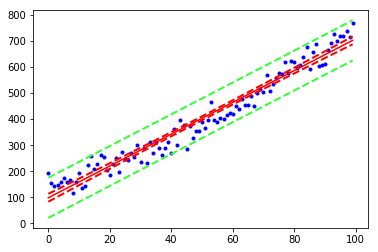

In [12]:
# Direct calculation of the CIs:

n = len(x)    

Sxx = np.sum(x**2) - n*np.mean(x)**2
Sxy = np.sum(x*y) - n*np.mean(x)*np.mean(y)    
mean_x = np.mean(x)
mean_y = np.mean(y)

a = Sxy/Sxx
b = mean_y - a*mean_x

# Residuals:
fit = lambda xx: b + a*xx    # with special word "lambda" a function can be defined in one line!
res = y - fit(x)

var_res = np.sum(res**2)/(n-2)  # residuals variance estimator
sd_res = np.sqrt(var_res)  # std of the residuals


alpha=0.05

Kvantil = stats.t.isf(alpha/2., n-2) # Quantile of t-raspodele for CIs

CI_for_f     = lambda x: sd_res * np.sqrt(  1./n + (x-mean_x)**2/Sxx)
CI_for_y = lambda x: sd_res * np.sqrt(1+1./n + (x-mean_x)**2/Sxx)

plt.figure()

plt.plot(x,y,'b.')
plt.plot(x,fit(x),'r-')

x.sort()
plt.plot(x, fit(x)+Kvantil*CI_for_f(x), 'r--', lw=2)
plt.plot(x, fit(x)-Kvantil*CI_for_f(x), 'r--', lw=2 )

plt.plot(x, fit(x)+Kvantil*CI_for_y(x), '--', lw=2, color=(0.2,1,0.2))
plt.plot(x, fit(x)-Kvantil*CI_for_y(x), '--', lw=2, color=(0.2,1,0.2))
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     223.1
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           2.07e-27
Time:                        22:22:19   Log-Likelihood:                -39.182
No. Observations:                  50   AIC:                             86.36
Df Residuals:                      46   BIC:                             94.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5324      0.029     18.338      0.0

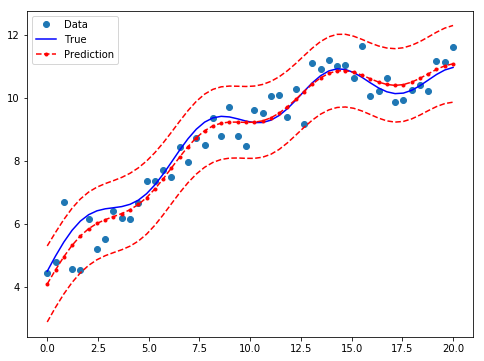

In [13]:
# CI using built-in functions:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# generateing artifical data:
number_of_samples = 50
sig = 0.5  #noise standard deviation
x = np.linspace(0, 20, number_of_samples)

# Input data matrix ( linear+sinusoidal+quadratic dependence):
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(number_of_samples)))

beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta) # we should get this in ideal case
y = y_true + sig * np.random.normal(size=number_of_samples)  # adding noise to this to generate observations


res = sm.OLS(y, X).fit()  # OLS fitting
print(res.summary())

# Plotting results:

#CIs for the regression curve can be obtained using: wls_prediction_std commands:
prstd, ip_down, ip_up = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="Prediction")
# CIs:
ax.plot(x, ip_up, 'r--') 
ax.plot(x, ip_down, 'r--')
ax.legend(loc='best')
plt.show()

# Regression on imported data

## Example 1: We will take data which connects selling of tobacco and alcohol in several cities in Europe:

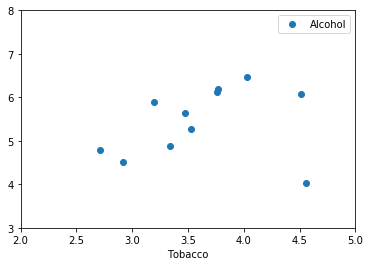

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats


# Importing data:
df=pd.read_csv('alc_tob.csv')

# plotting
df.plot('Tobacco', 'Alcohol', style='o')

plt.xlim([2,5])
plt.ylim([3,8])
plt.show()


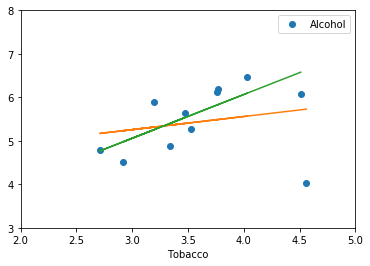

In [15]:
Rez1= sm.ols('Alcohol ~ Tobacco', df).fit()
Rez2 = sm.ols('Alcohol ~ Tobacco', df[:-1]).fit()  # The last point seems to be outlier, so lets remove it
df.plot('Tobacco', 'Alcohol', style='o')
plt.plot(df.Tobacco, Rez1.fittedvalues)
plt.plot(df.Tobacco[:-1], Rez2.fittedvalues)
plt.xlim([2,5])
plt.ylim([3,8])
plt.show()

In [16]:
print(Rez1.summary())
print(Rez2.summary())

                            OLS Regression Results                            
Dep. Variable:                Alcohol   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.4735
Date:                Sat, 19 Oct 2019   Prob (F-statistic):              0.509
Time:                        22:22:20   Log-Likelihood:                -12.317
No. Observations:                  11   AIC:                             28.63
Df Residuals:                       9   BIC:                             29.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3512      1.607      2.708      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [17]:
# We see that R-squared is much better when we exclude the outlier!

## 5th method for regression (using popular library for machine learning: sklearn )

0.6151066005541352
0.04998449027586837


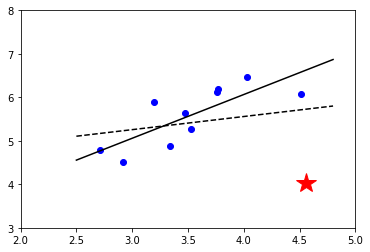

In [18]:
from sklearn.linear_model import LinearRegression


# this library works with numpy matrices:

data = np.matrix( df )

# we create regression objects and then fit to data:

cln = LinearRegression()  # outlier removed
org = LinearRegression()   # original set

X, Y = data[:,2], data[:,1]
cln.fit( X[:-1], Y[:-1] )  # fitting on the first training set
org.fit( X, Y )   # fitting on all the whole training set

print(cln.score( X[:-1], Y[:-1] ) )  # .score is R^2 index
print(org.score( X, Y ))
    
# plotting (outlier is shown using star):
plt.plot( df.Tobacco[:-1], df.Alcohol[:-1], 'bo')
plt.plot( df.Tobacco[-1:], df.Alcohol[-1:], 'r*',ms=20, lw=10)
plt.xlim([2,5])
plt.ylim([3,8]) 

# Lets test prediction performance of the trained models (set for testing - test data):

# we generate new points:

test = np.c_[np.arange(2.5, 4.85, 0.1)]  # it must be vector column! np._c_ makes column (we could also use np.marix)

plt.plot( test, cln.predict( test ), 'k' )
plt.plot( test, org.predict( test ), 'k--' )

plt.show()


## Example 2: modeling connection between human height and weight 

In [19]:
HW=pd.read_csv('hw_25000.csv')  #importin data 25000 people
print(HW.head())
HW=HW.iloc[:,1:] # remove first column
print(HW.head())
HW.columns=['Height','Weight']  # we give names to columns
HW.head()

   Index   "Height(Inches)"   "Weight(Pounds)"
0      1           65.78331           112.9925
1      2           71.51521           136.4873
2      3           69.39874           153.0269
3      4           68.21660           142.3354
4      5           67.78781           144.2971
    "Height(Inches)"   "Weight(Pounds)"
0           65.78331           112.9925
1           71.51521           136.4873
2           69.39874           153.0269
3           68.21660           142.3354
4           67.78781           144.2971


,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [20]:
HW.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [21]:
# linear regression (2nd method):

A=np.array(HW['Height'])
A=np.array([np.ones(len(A)),A])
y=np.array(HW['Weight'])
print(A.shape,y.shape)

w1 = np.linalg.lstsq(A.T,y)[0] # parameters
w1

(2, 25000) (25000,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([-82.57574306,   3.08347645])

In [22]:
# function which calculates fitted value at given point x, for given parameters w
def f(x,w):
    return w[0]+w[1]*x

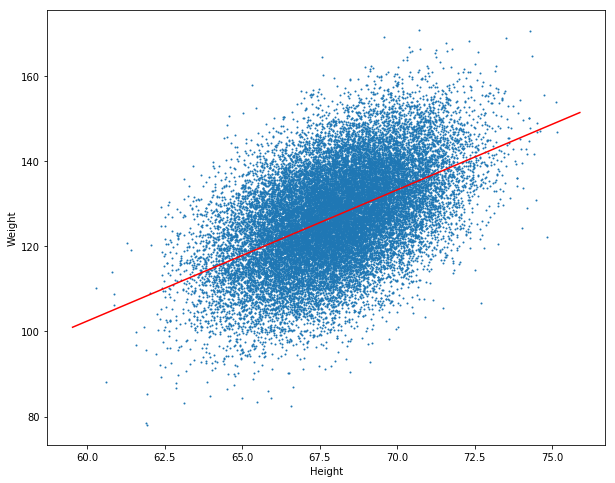

In [23]:
ax=HW.plot(kind='scatter',s=1,x='Height',y='Weight',figsize=[10,8])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # two pints are enough for plotting line 
plt.show()

## Exercise 1: perform regression using other 4 methods.
## Exercise 2: perform the opposite regression - dependence of heigh on weight (we will not obtain the same curve!) 

### Polynomial regression:

In [24]:
# Lets modify data (artificially introduce some variable which has quadratic dependence on Height):
HW['P2']=HW['Weight']+(HW['Height']-68)**2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


w1= [-77.29147795   3.05894484]


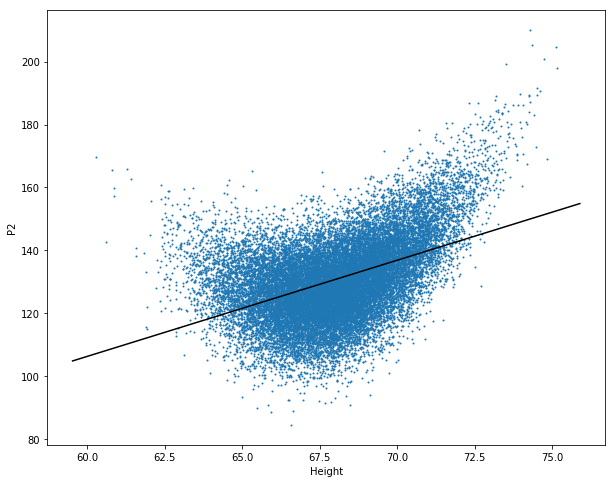

In [25]:
# Linear regresion on modified data:
A=np.array(HW['Height'])
A=np.array([np.ones(len(A)),A])
y=np.array(HW['P2'])

w1 = np.linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print('w1=',w1)
def f(x,w):
    return w[0]+w[1]*x

ax=HW.plot(kind='scatter',s=1,x='Height',y='P2',figsize=[10,8])
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


w2= [ 4.57718628e+03 -1.33969361e+02  1.00774285e+00]


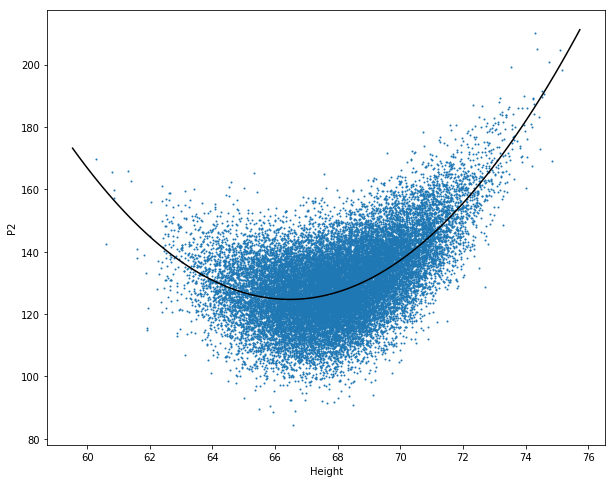

In [26]:
# Quadratic regression:

A=np.array(HW['Height'])
A=np.array([np.ones(len(A)),A,A**2])
y=np.array(HW['P2'])

w2 = np.linalg.lstsq(A.T,y)[0] 
print('w2=',w2)
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

ax=HW.plot(kind='scatter',s=1,x='Height',y='P2',figsize=[10,8])
x0,x1=plt.xlim()

interval=x1-x0
X=np.arange(x0,x1,interval/100.)
ax.plot(X,f2(X,w2),'k')
plt.show()

# Multiple regression

### So far we have only modeled dependence betwee two variables. Now we wll see that similarly we can model dependence of one (dependent) variable on many independent variables: 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols


# Importing data (100m swimming results depending on the gender and year):
df=pd.read_csv('swim100m.csv')
df.head()

,year,time,sex
0,1905,65.8,M
1,1908,65.6,M
2,1910,62.8,M
3,1912,61.6,M
4,1918,61.4,M


In [28]:
model1 = ols("time ~ sex", df).fit()  # model indendent of the year
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     24.13
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           7.28e-06
Time:                        22:22:23   Log-Likelihood:                -219.23
No. Observations:                  62   AIC:                             442.5
Df Residuals:                      60   BIC:                             446.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.1923      1.517     42.986      0.0

In [29]:
model2 = ols("time ~ sex + year", df).fit()   # dependence on two features
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           1.58e-24
Time:                        22:22:23   Log-Likelihood:                -172.12
No. Observations:                  62   AIC:                             350.2
Df Residuals:                      59   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    555.7168     33.800     16.441      0.0

In [30]:
model3 = ols("time ~ sex * year", df).fit()   # two features and their interaction (product)
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sat, 19 Oct 2019   Prob (F-statistic):           3.67e-28
Time:                        22:22:23   Log-Likelihood:                -160.30
No. Observations:                  62   AIC:                             328.6
Df Residuals:                      58   BIC:                             337.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       697.3012     39.221     17.779